In [136]:
import pandas as pd 
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

## Read in the feature-selected data sets 

In [137]:
senate = pd.read_csv('senate_merged.csv')
corr_senate = senate.corr()
print(senate.shape)

(180, 10)


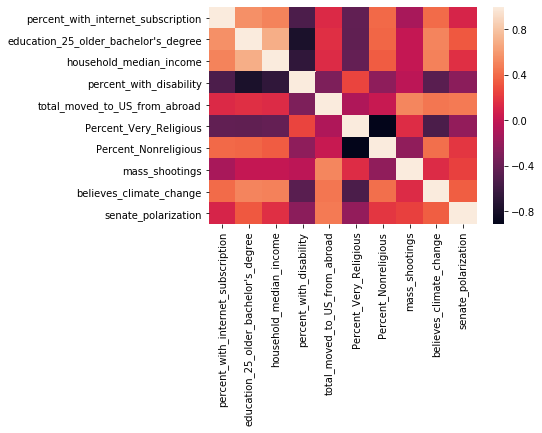

In [138]:
sns.heatmap(corr_senate)

In [139]:
house = pd.read_csv('house_merged.csv')
corr_house = house.corr()
print(house.shape)

(180, 10)


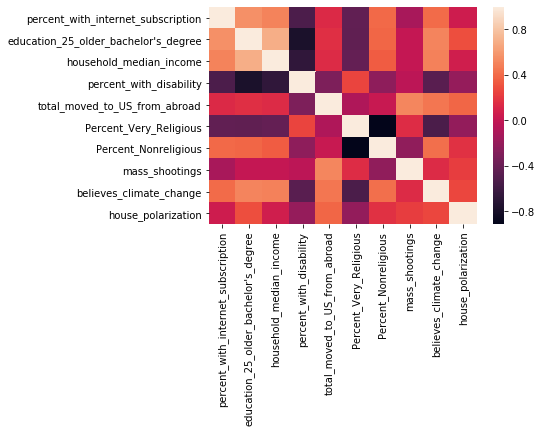

In [140]:
sns.heatmap(corr_house)

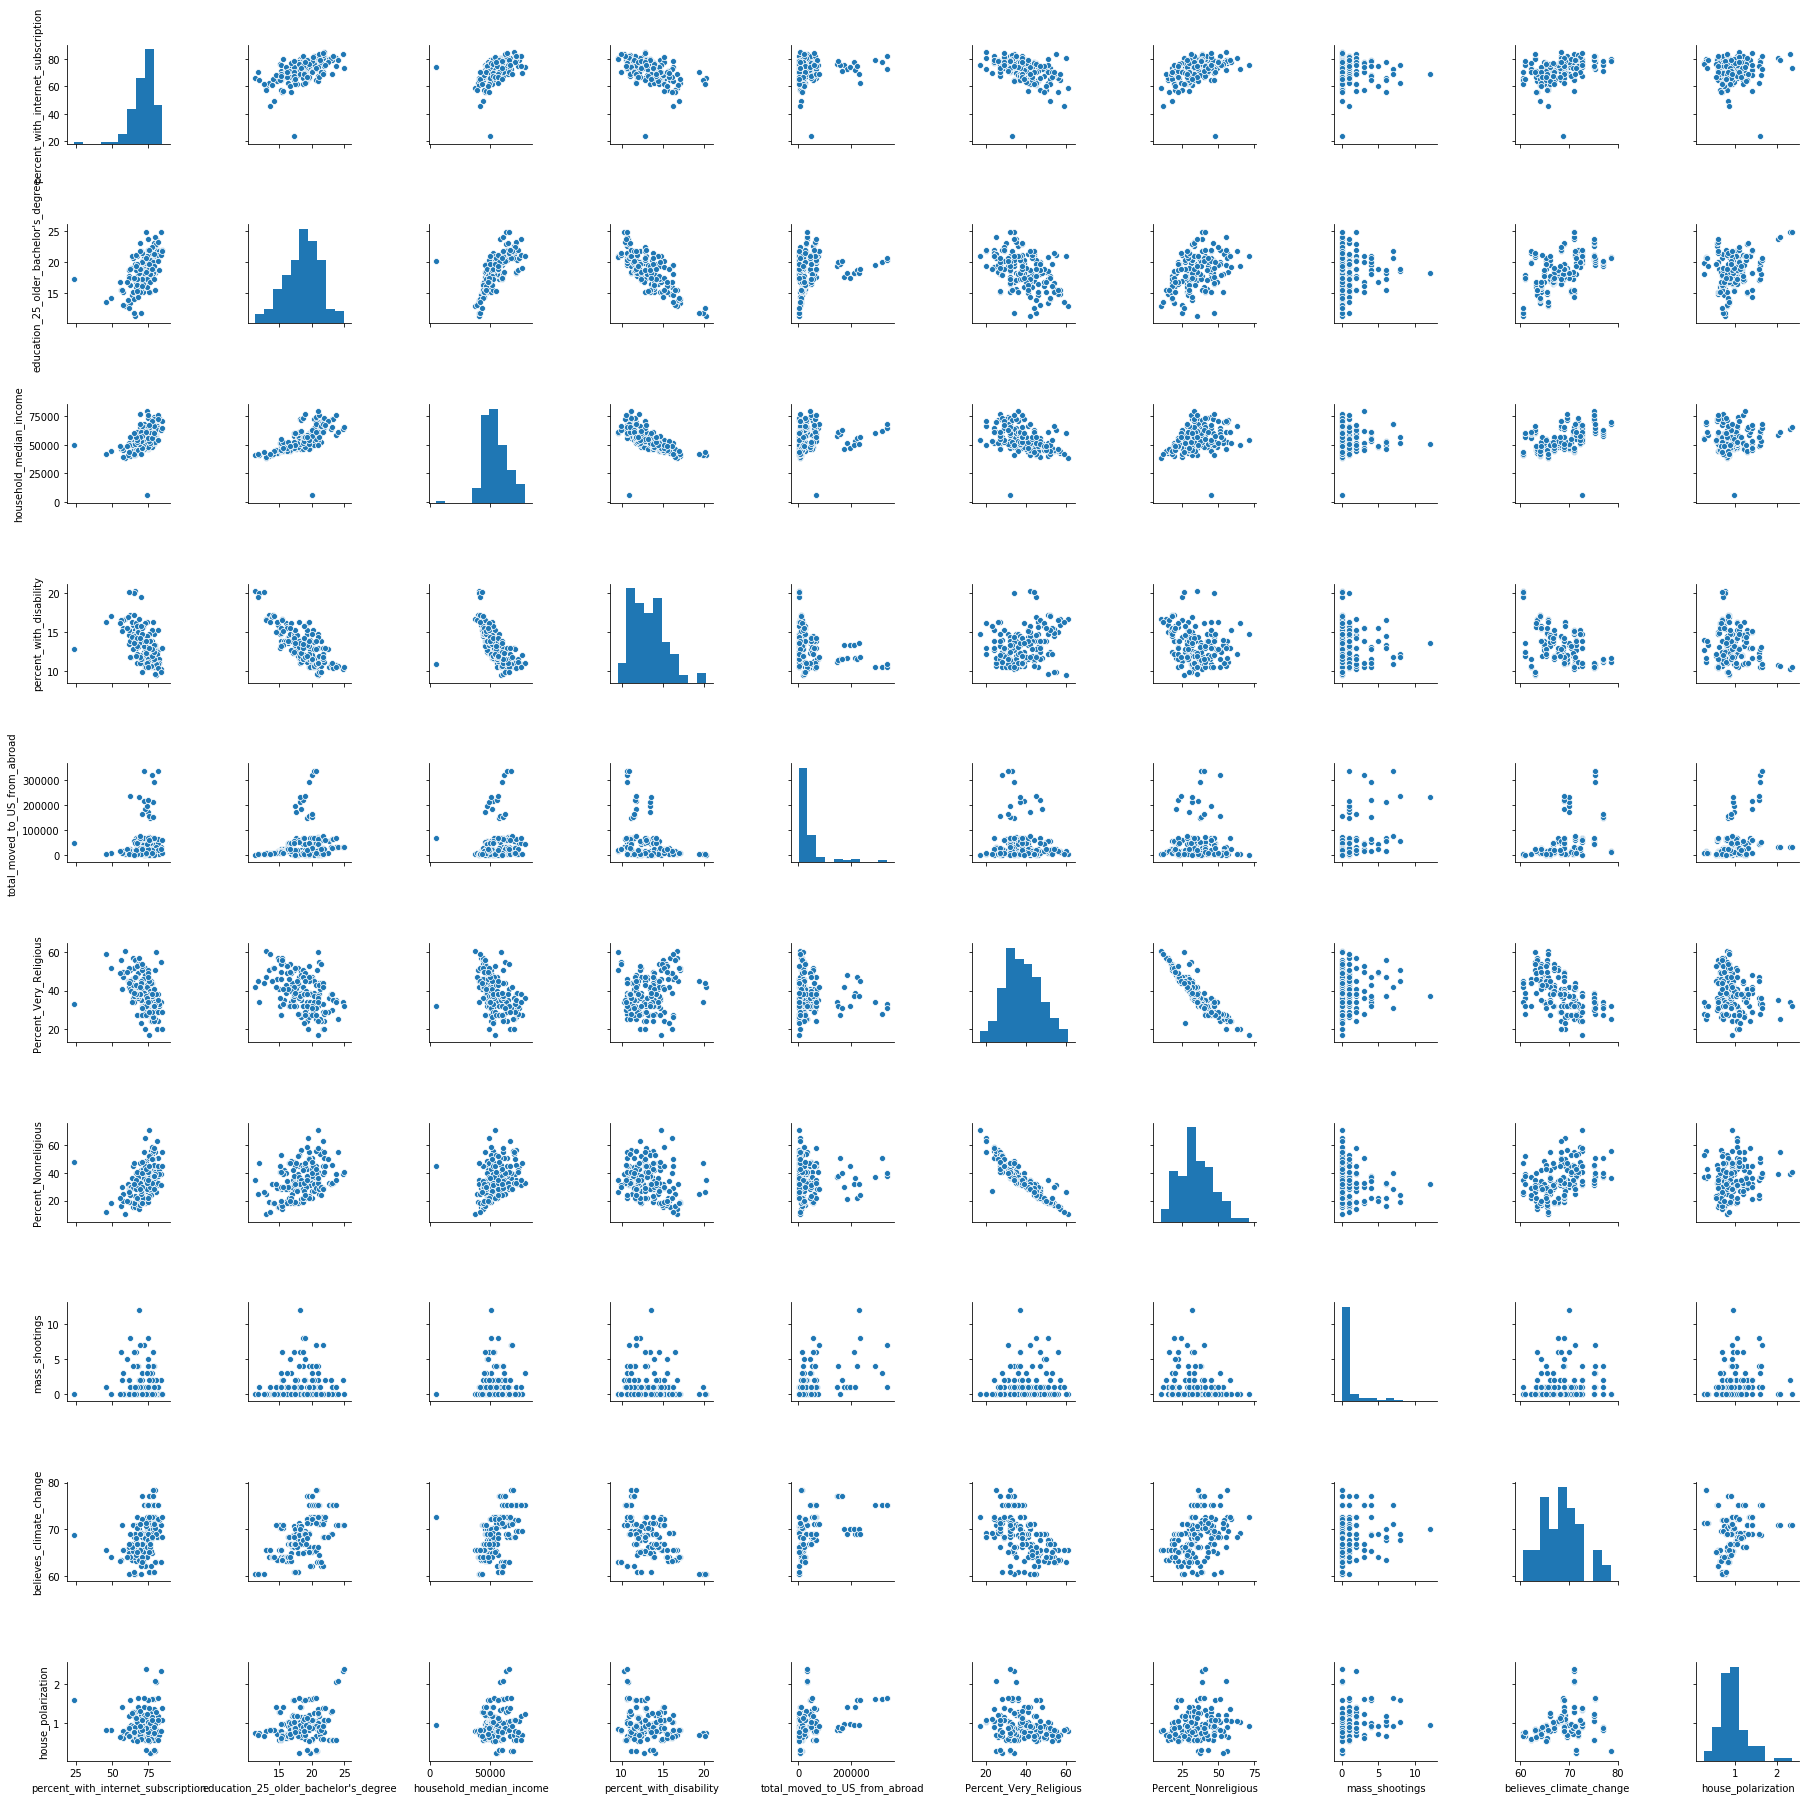

In [141]:
sns.pairplot(house)

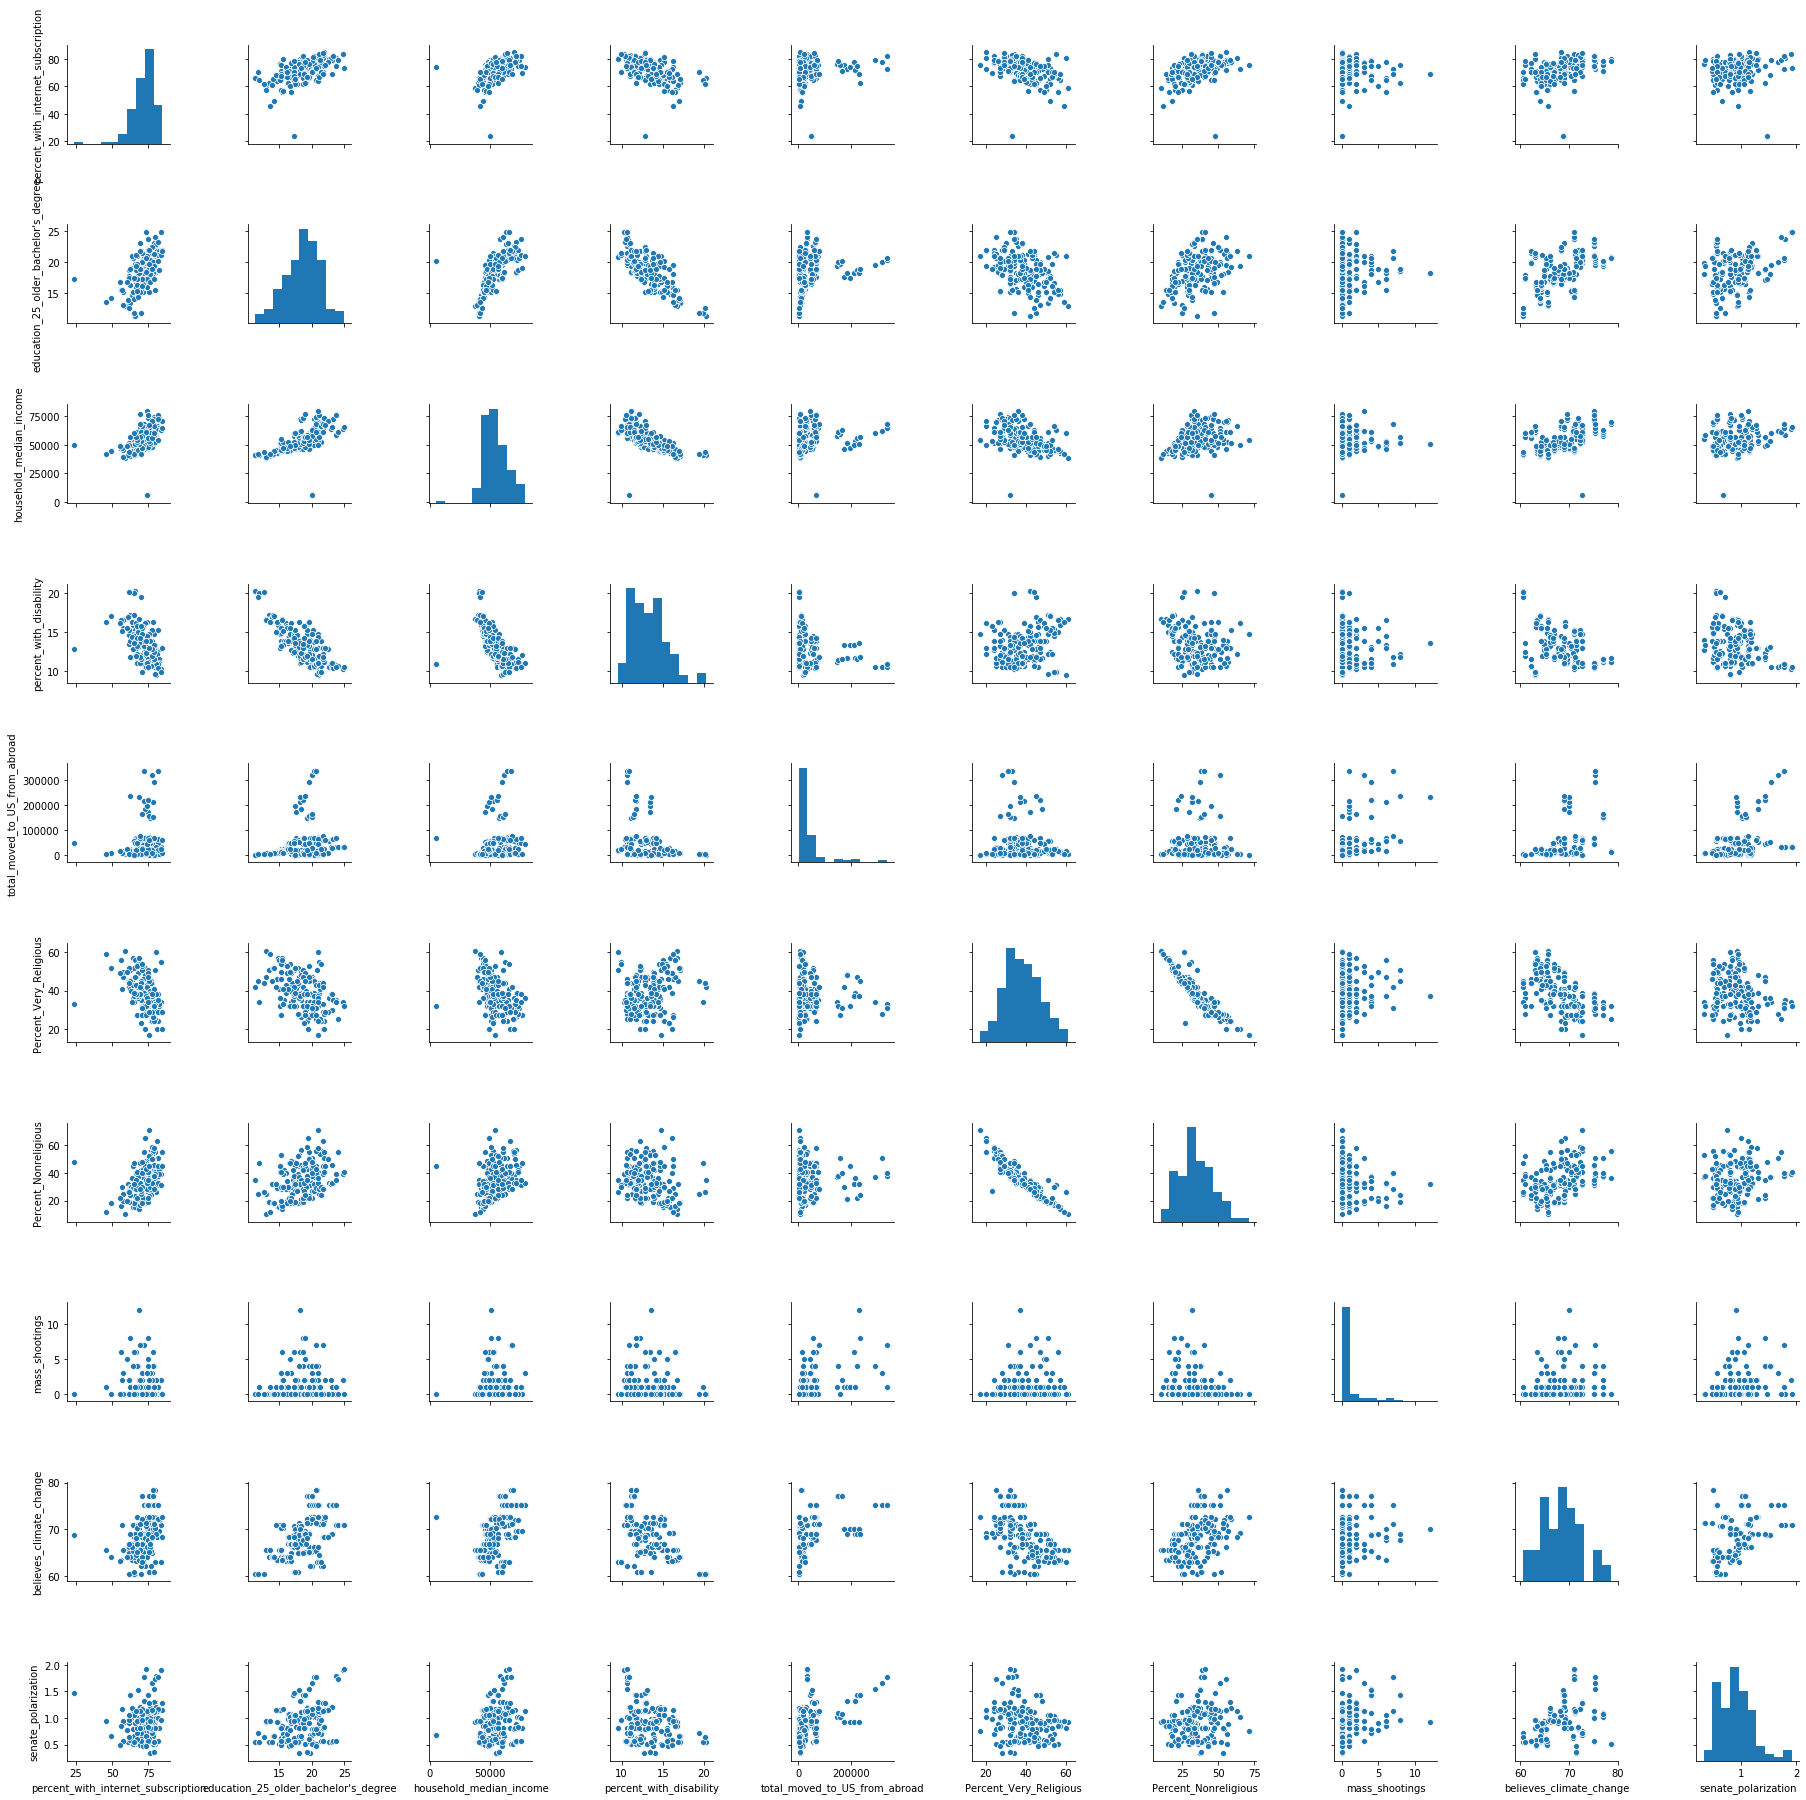

In [142]:
sns.pairplot(senate)

In [143]:
y_senate = senate.pop('senate_polarization')

In [144]:
y_house = house.pop('house_polarization')

## Pre-processing: train-test split and min-max scaling

In [145]:
from sklearn.model_selection import train_test_split

X_house_train, X_house_test, y_house_train, y_house_test = train_test_split(
    house, y_house, test_size=0.2, random_state=11)

X_senate_train, X_senate_test, y_senate_train, y_senate_test = train_test_split(
    senate, y_senate, test_size=0.2, random_state=11)

In [146]:
from sklearn.preprocessing import MinMaxScaler 
scal = MinMaxScaler()
X_house_train = scal.fit_transform(X_house_train)
X_house_test = scal.fit_transform(X_house_test)
X_senate_train = scal.fit_transform(X_senate_train)
X_senate_test = scal.fit_transform(X_senate_test)

## Model building
House and Senate tasks

In [147]:
from sklearn.metrics import mean_squared_error

In [148]:
from sklearn.linear_model import LinearRegression

In [149]:
OLD_house = LinearRegression()
OLD_house.fit(X_house_train, y_house_train)
lin_y_hat_house = OLD_house.predict(X_house_test)
print('Linear regression house RMSE:', np.sqrt(mean_squared_error(y_house_test, lin_y_hat_house)))

Linear regression house RMSE: 0.4206944458745222


In [165]:
OLD_senate = LinearRegression()
OLD_senate.fit(X_senate_train, y_senate_train)
lin_y_hat_senate = OLD_senate.predict(X_senate_test)
print('Linear regression senate RMSE:', np.sqrt(mean_squared_error(y_senate_test, lin_y_hat_senate)))

Linear regression senate RMSE: 0.3276987777322123


In [167]:
svr_house = SVR(kernel = 'rbf', epsilon = 0.1, degree = 3, gamma = 'auto')
svr_house.fit(X_house_train, y_house_train)
svm_y_hat_house = svr_house.predict(X_house_test)
print('SVM house RMSE:', np.sqrt(mean_squared_error(y_house_test, svm_y_hat_house)))

SVM house RMSE: 0.3862044267075951


In [166]:
from sklearn.svm import SVR
svr_senate = SVR(kernel = 'rbf', epsilon = 0.1, degree = 3, gamma = 'auto')
svr_senate.fit(X_senate_train, y_senate_train)
svm_y_hat_senate = svr_senate.predict(X_senate_test)
print('SVM senate RMSE:', np.sqrt(mean_squared_error(y_senate_test, svm_y_hat_senate)))

SVM senate RMSE: 0.3078949512222789


In [200]:
import tensorflow as tf
from keras.layers import Dense, Dropout
import keras
from keras.callbacks.callbacks import ModelCheckpoint

In [182]:
tf.random.set_seed(11)
keras.backend.clear_session()

In [222]:
full_model = keras.Sequential([
    Dense(5, activation = 'relu', input_dim = 9),
    Dropout(0.2),
    Dense(1, activation = 'linear')
    ])


full_model.compile(loss = 'mean_squared_error', 
                   optimizer = 'Adam')

filepath = 'saved_models_senate/model_epoch_{epoch:02d}.hdf5'

checkpoint = ModelCheckpoint(filepath = filepath,
                             monitor = 'val_loss',
                             verbose = 1,
                             save_best_only = True,
                             mode ='min'
                            )

history = full_model.fit(X_senate_train, y_senate_train,
                         epochs = 500, 
                         batch_size = 35, 
                         validation_data = (X_senate_test, y_senate_test),
                         callbacks = [checkpoint])

Train on 144 samples, validate on 36 samples
Epoch 1/500
144/144 [==============================] - 1s 5ms/step - loss: 0.8929 - val_loss: 0.8302

Epoch 00001: val_loss improved from inf to 0.83023, saving model to saved_models_senate/model_epoch_01.hdf5
Epoch 2/500
144/144 [==============================] - 0s 91us/step - loss: 0.8413 - val_loss: 0.7873

Epoch 00002: val_loss improved from 0.83023 to 0.78728, saving model to saved_models_senate/model_epoch_02.hdf5
Epoch 3/500
144/144 [==============================] - 0s 108us/step - loss: 0.7948 - val_loss: 0.7464

Epoch 00003: val_loss improved from 0.78728 to 0.74642, saving model to saved_models_senate/model_epoch_03.hdf5
Epoch 4/500
144/144 [==============================] - 0s 94us/step - loss: 0.7376 - val_loss: 0.7067

Epoch 00004: val_loss improved from 0.74642 to 0.70674, saving model to saved_models_senate/model_epoch_04.hdf5
Epoch 5/500
144/144 [==============================] - 0s 91us/step - loss: 0.6861 - val_loss: 0.66

Epoch 40/500
144/144 [==============================] - 0s 76us/step - loss: 0.0930 - val_loss: 0.1079

Epoch 00040: val_loss improved from 0.10817 to 0.10791, saving model to saved_models_senate/model_epoch_40.hdf5
Epoch 41/500
144/144 [==============================] - 0s 76us/step - loss: 0.0741 - val_loss: 0.1082

Epoch 00041: val_loss did not improve from 0.10791
Epoch 42/500
144/144 [==============================] - 0s 74us/step - loss: 0.0772 - val_loss: 0.1083

Epoch 00042: val_loss did not improve from 0.10791
Epoch 43/500
144/144 [==============================] - 0s 70us/step - loss: 0.0742 - val_loss: 0.1092

Epoch 00043: val_loss did not improve from 0.10791
Epoch 44/500
144/144 [==============================] - 0s 71us/step - loss: 0.0725 - val_loss: 0.1101

Epoch 00044: val_loss did not improve from 0.10791
Epoch 45/500
144/144 [==============================] - 0s 71us/step - loss: 0.0788 - val_loss: 0.1101

Epoch 00045: val_loss did not improve from 0.10791
Epoch 46/

144/144 [==============================] - 0s 77us/step - loss: 0.0780 - val_loss: 0.1099

Epoch 00143: val_loss did not improve from 0.10702
Epoch 144/500
144/144 [==============================] - 0s 74us/step - loss: 0.0790 - val_loss: 0.1097

Epoch 00144: val_loss did not improve from 0.10702
Epoch 145/500
144/144 [==============================] - 0s 69us/step - loss: 0.0800 - val_loss: 0.1092

Epoch 00145: val_loss did not improve from 0.10702
Epoch 146/500
144/144 [==============================] - 0s 79us/step - loss: 0.0748 - val_loss: 0.1084

Epoch 00146: val_loss did not improve from 0.10702
Epoch 147/500
144/144 [==============================] - 0s 75us/step - loss: 0.0669 - val_loss: 0.1080

Epoch 00147: val_loss did not improve from 0.10702
Epoch 148/500
144/144 [==============================] - 0s 85us/step - loss: 0.0775 - val_loss: 0.1082

Epoch 00148: val_loss did not improve from 0.10702
Epoch 149/500
144/144 [==============================] - 0s 77us/step - loss: 

144/144 [==============================] - 0s 91us/step - loss: 0.0700 - val_loss: 0.1072

Epoch 00246: val_loss did not improve from 0.10559
Epoch 247/500
144/144 [==============================] - 0s 95us/step - loss: 0.0718 - val_loss: 0.1074

Epoch 00247: val_loss did not improve from 0.10559
Epoch 248/500
144/144 [==============================] - 0s 83us/step - loss: 0.0805 - val_loss: 0.1076

Epoch 00248: val_loss did not improve from 0.10559
Epoch 249/500
144/144 [==============================] - 0s 80us/step - loss: 0.0753 - val_loss: 0.1082

Epoch 00249: val_loss did not improve from 0.10559
Epoch 250/500
144/144 [==============================] - 0s 79us/step - loss: 0.0745 - val_loss: 0.1078

Epoch 00250: val_loss did not improve from 0.10559
Epoch 251/500
144/144 [==============================] - 0s 83us/step - loss: 0.0719 - val_loss: 0.1067

Epoch 00251: val_loss did not improve from 0.10559
Epoch 252/500
144/144 [==============================] - 0s 80us/step - loss: 

144/144 [==============================] - 0s 84us/step - loss: 0.0691 - val_loss: 0.1041

Epoch 00347: val_loss did not improve from 0.10338
Epoch 348/500
144/144 [==============================] - 0s 77us/step - loss: 0.0690 - val_loss: 0.1047

Epoch 00348: val_loss did not improve from 0.10338
Epoch 349/500
144/144 [==============================] - 0s 75us/step - loss: 0.0793 - val_loss: 0.1050

Epoch 00349: val_loss did not improve from 0.10338
Epoch 350/500
144/144 [==============================] - 0s 88us/step - loss: 0.0729 - val_loss: 0.1052

Epoch 00350: val_loss did not improve from 0.10338
Epoch 351/500
144/144 [==============================] - 0s 79us/step - loss: 0.0738 - val_loss: 0.1052

Epoch 00351: val_loss did not improve from 0.10338
Epoch 352/500
144/144 [==============================] - 0s 70us/step - loss: 0.0726 - val_loss: 0.1056

Epoch 00352: val_loss did not improve from 0.10338
Epoch 353/500
144/144 [==============================] - 0s 71us/step - loss: 

Epoch 395/500
144/144 [==============================] - 0s 69us/step - loss: 0.0809 - val_loss: 0.0999

Epoch 00395: val_loss improved from 0.10006 to 0.09990, saving model to saved_models_senate/model_epoch_395.hdf5
Epoch 396/500
144/144 [==============================] - 0s 74us/step - loss: 0.0637 - val_loss: 0.0999

Epoch 00396: val_loss improved from 0.09990 to 0.09986, saving model to saved_models_senate/model_epoch_396.hdf5
Epoch 397/500
144/144 [==============================] - 0s 106us/step - loss: 0.0733 - val_loss: 0.0998

Epoch 00397: val_loss improved from 0.09986 to 0.09981, saving model to saved_models_senate/model_epoch_397.hdf5
Epoch 398/500
144/144 [==============================] - 0s 97us/step - loss: 0.0690 - val_loss: 0.1002

Epoch 00398: val_loss did not improve from 0.09981
Epoch 399/500
144/144 [==============================] - 0s 101us/step - loss: 0.0709 - val_loss: 0.1008

Epoch 00399: val_loss did not improve from 0.09981
Epoch 400/500
144/144 [=========

Epoch 446/500
144/144 [==============================] - 0s 94us/step - loss: 0.0699 - val_loss: 0.0994

Epoch 00446: val_loss improved from 0.09953 to 0.09944, saving model to saved_models_senate/model_epoch_446.hdf5
Epoch 447/500
144/144 [==============================] - 0s 85us/step - loss: 0.0730 - val_loss: 0.1000

Epoch 00447: val_loss did not improve from 0.09944
Epoch 448/500
144/144 [==============================] - 0s 92us/step - loss: 0.0710 - val_loss: 0.1007

Epoch 00448: val_loss did not improve from 0.09944
Epoch 449/500
144/144 [==============================] - 0s 90us/step - loss: 0.0724 - val_loss: 0.1012

Epoch 00449: val_loss did not improve from 0.09944
Epoch 450/500
144/144 [==============================] - 0s 85us/step - loss: 0.0678 - val_loss: 0.1009

Epoch 00450: val_loss did not improve from 0.09944
Epoch 451/500
144/144 [==============================] - 0s 86us/step - loss: 0.0722 - val_loss: 0.1003

Epoch 00451: val_loss did not improve from 0.09944
Ep

144/144 [==============================] - 0s 81us/step - loss: 0.0644 - val_loss: 0.0990

Epoch 00497: val_loss improved from 0.09908 to 0.09896, saving model to saved_models_senate/model_epoch_497.hdf5
Epoch 498/500
144/144 [==============================] - 0s 90us/step - loss: 0.0690 - val_loss: 0.0990

Epoch 00498: val_loss did not improve from 0.09896
Epoch 499/500
144/144 [==============================] - 0s 80us/step - loss: 0.0698 - val_loss: 0.0996

Epoch 00499: val_loss did not improve from 0.09896
Epoch 500/500
144/144 [==============================] - 0s 75us/step - loss: 0.0648 - val_loss: 0.1001

Epoch 00500: val_loss did not improve from 0.09896


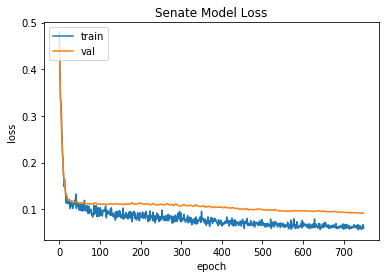

In [220]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Senate Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [29]:
from keras.models import load_model

best_senate = load_model('saved_models_senate/model_epoch_264.hdf5')

ANN_y_hat_senate = best_senate.predict(X_senate_test)

print('ANN senate RMSE:', np.sqrt(mean_squared_error(y_senate_test, ANN_y_hat_senate)))

Using TensorFlow backend.


ANN senate RMSE: 0.2894786315070461


In [211]:
full_model_house = keras.Sequential([
    Dense(5, activation = 'tanh', input_dim = 9),
    Dropout(0.2),
    Dense(1, activation = 'linear')
    ])


full_model_house.compile(loss = 'mean_squared_error', 
                   optimizer = 'Adam')

filepath2 = 'saved_models_house/model_epoch_{epoch:02d}.hdf5'

checkpoint_house = ModelCheckpoint(filepath = filepath2,
                             monitor = 'val_loss',
                             verbose = 1,
                             save_best_only = False,
                             mode ='min'
                            )


history_house = full_model_house.fit(X_house_train, y_house_train,
                         epochs = 500, 
                         batch_size = 30, 
                         validation_data = (X_house_test, y_house_test),
                         callbacks = [checkpoint_house])

Train on 144 samples, validate on 36 samples
Epoch 1/500
144/144 [==============================] - 1s 5ms/step - loss: 0.2889 - val_loss: 0.2041

Epoch 00001: saving model to saved_models_house/model_epoch_01.hdf5
Epoch 2/500
144/144 [==============================] - 0s 89us/step - loss: 0.2858 - val_loss: 0.1865

Epoch 00002: saving model to saved_models_house/model_epoch_02.hdf5
Epoch 3/500
144/144 [==============================] - 0s 77us/step - loss: 0.2868 - val_loss: 0.1767

Epoch 00003: saving model to saved_models_house/model_epoch_03.hdf5
Epoch 4/500
144/144 [==============================] - 0s 80us/step - loss: 0.2265 - val_loss: 0.1721

Epoch 00004: saving model to saved_models_house/model_epoch_04.hdf5
Epoch 5/500
144/144 [==============================] - 0s 76us/step - loss: 0.2199 - val_loss: 0.1701

Epoch 00005: saving model to saved_models_house/model_epoch_05.hdf5
Epoch 6/500
144/144 [==============================] - 0s 74us/step - loss: 0.2315 - val_loss: 0.1687

Epoch 96/500
144/144 [==============================] - 0s 119us/step - loss: 0.1117 - val_loss: 0.1417

Epoch 00096: saving model to saved_models_house/model_epoch_96.hdf5
Epoch 97/500
144/144 [==============================] - 0s 116us/step - loss: 0.1193 - val_loss: 0.1426

Epoch 00097: saving model to saved_models_house/model_epoch_97.hdf5
Epoch 98/500
144/144 [==============================] - 0s 117us/step - loss: 0.1081 - val_loss: 0.1430

Epoch 00098: saving model to saved_models_house/model_epoch_98.hdf5
Epoch 99/500
144/144 [==============================] - 0s 95us/step - loss: 0.1178 - val_loss: 0.1430

Epoch 00099: saving model to saved_models_house/model_epoch_99.hdf5
Epoch 100/500
144/144 [==============================] - 0s 106us/step - loss: 0.1045 - val_loss: 0.1422

Epoch 00100: saving model to saved_models_house/model_epoch_100.hdf5
Epoch 101/500
144/144 [==============================] - 0s 112us/step - loss: 0.1031 - val_loss: 0.1418

Epoch 00101: saving model to

Epoch 143/500
144/144 [==============================] - 0s 127us/step - loss: 0.1121 - val_loss: 0.1427

Epoch 00143: saving model to saved_models_house/model_epoch_143.hdf5
Epoch 144/500
144/144 [==============================] - 0s 96us/step - loss: 0.1073 - val_loss: 0.1427

Epoch 00144: saving model to saved_models_house/model_epoch_144.hdf5
Epoch 145/500
144/144 [==============================] - 0s 92us/step - loss: 0.1146 - val_loss: 0.1431

Epoch 00145: saving model to saved_models_house/model_epoch_145.hdf5
Epoch 146/500
144/144 [==============================] - 0s 100us/step - loss: 0.1039 - val_loss: 0.1443

Epoch 00146: saving model to saved_models_house/model_epoch_146.hdf5
Epoch 147/500
144/144 [==============================] - 0s 100us/step - loss: 0.1113 - val_loss: 0.1464

Epoch 00147: saving model to saved_models_house/model_epoch_147.hdf5
Epoch 148/500
144/144 [==============================] - 0s 95us/step - loss: 0.0963 - val_loss: 0.1457

Epoch 00148: saving mo

Epoch 190/500
144/144 [==============================] - 0s 94us/step - loss: 0.0902 - val_loss: 0.1441

Epoch 00190: saving model to saved_models_house/model_epoch_190.hdf5
Epoch 191/500
144/144 [==============================] - 0s 94us/step - loss: 0.1014 - val_loss: 0.1452

Epoch 00191: saving model to saved_models_house/model_epoch_191.hdf5
Epoch 192/500
144/144 [==============================] - 0s 94us/step - loss: 0.1071 - val_loss: 0.1460

Epoch 00192: saving model to saved_models_house/model_epoch_192.hdf5
Epoch 193/500
144/144 [==============================] - 0s 91us/step - loss: 0.1031 - val_loss: 0.1473

Epoch 00193: saving model to saved_models_house/model_epoch_193.hdf5
Epoch 194/500
144/144 [==============================] - 0s 87us/step - loss: 0.0977 - val_loss: 0.1473

Epoch 00194: saving model to saved_models_house/model_epoch_194.hdf5
Epoch 195/500
144/144 [==============================] - 0s 88us/step - loss: 0.1053 - val_loss: 0.1476

Epoch 00195: saving model

144/144 [==============================] - 0s 95us/step - loss: 0.0819 - val_loss: 0.1457

Epoch 00237: saving model to saved_models_house/model_epoch_237.hdf5
Epoch 238/500
144/144 [==============================] - 0s 107us/step - loss: 0.0822 - val_loss: 0.1454

Epoch 00238: saving model to saved_models_house/model_epoch_238.hdf5
Epoch 239/500
144/144 [==============================] - 0s 101us/step - loss: 0.0920 - val_loss: 0.1458

Epoch 00239: saving model to saved_models_house/model_epoch_239.hdf5
Epoch 240/500
144/144 [==============================] - 0s 85us/step - loss: 0.1027 - val_loss: 0.1454

Epoch 00240: saving model to saved_models_house/model_epoch_240.hdf5
Epoch 241/500
144/144 [==============================] - 0s 81us/step - loss: 0.0934 - val_loss: 0.1459

Epoch 00241: saving model to saved_models_house/model_epoch_241.hdf5
Epoch 242/500
144/144 [==============================] - 0s 86us/step - loss: 0.0976 - val_loss: 0.1463

Epoch 00242: saving model to saved_mo

144/144 [==============================] - 0s 112us/step - loss: 0.0889 - val_loss: 0.1483

Epoch 00284: saving model to saved_models_house/model_epoch_284.hdf5
Epoch 285/500
144/144 [==============================] - 0s 106us/step - loss: 0.0930 - val_loss: 0.1491

Epoch 00285: saving model to saved_models_house/model_epoch_285.hdf5
Epoch 286/500
144/144 [==============================] - 0s 98us/step - loss: 0.0885 - val_loss: 0.1499

Epoch 00286: saving model to saved_models_house/model_epoch_286.hdf5
Epoch 287/500
144/144 [==============================] - 0s 88us/step - loss: 0.0865 - val_loss: 0.1500

Epoch 00287: saving model to saved_models_house/model_epoch_287.hdf5
Epoch 288/500
144/144 [==============================] - 0s 94us/step - loss: 0.0974 - val_loss: 0.1493

Epoch 00288: saving model to saved_models_house/model_epoch_288.hdf5
Epoch 289/500
144/144 [==============================] - 0s 104us/step - loss: 0.0855 - val_loss: 0.1488

Epoch 00289: saving model to saved_m

Epoch 331/500
144/144 [==============================] - 0s 110us/step - loss: 0.0778 - val_loss: 0.1502

Epoch 00331: saving model to saved_models_house/model_epoch_331.hdf5
Epoch 332/500
144/144 [==============================] - 0s 104us/step - loss: 0.0797 - val_loss: 0.1512

Epoch 00332: saving model to saved_models_house/model_epoch_332.hdf5
Epoch 333/500
144/144 [==============================] - 0s 100us/step - loss: 0.0873 - val_loss: 0.1528

Epoch 00333: saving model to saved_models_house/model_epoch_333.hdf5
Epoch 334/500
144/144 [==============================] - 0s 118us/step - loss: 0.0876 - val_loss: 0.1526

Epoch 00334: saving model to saved_models_house/model_epoch_334.hdf5
Epoch 335/500
144/144 [==============================] - 0s 120us/step - loss: 0.0903 - val_loss: 0.1511

Epoch 00335: saving model to saved_models_house/model_epoch_335.hdf5
Epoch 336/500
144/144 [==============================] - 0s 114us/step - loss: 0.0859 - val_loss: 0.1495

Epoch 00336: saving

Epoch 378/500
144/144 [==============================] - 0s 96us/step - loss: 0.0881 - val_loss: 0.1511

Epoch 00378: saving model to saved_models_house/model_epoch_378.hdf5
Epoch 379/500
144/144 [==============================] - 0s 102us/step - loss: 0.0808 - val_loss: 0.1506

Epoch 00379: saving model to saved_models_house/model_epoch_379.hdf5
Epoch 380/500
144/144 [==============================] - 0s 120us/step - loss: 0.0832 - val_loss: 0.1507

Epoch 00380: saving model to saved_models_house/model_epoch_380.hdf5
Epoch 381/500
144/144 [==============================] - 0s 107us/step - loss: 0.0867 - val_loss: 0.1503

Epoch 00381: saving model to saved_models_house/model_epoch_381.hdf5
Epoch 382/500
144/144 [==============================] - 0s 99us/step - loss: 0.0822 - val_loss: 0.1496

Epoch 00382: saving model to saved_models_house/model_epoch_382.hdf5
Epoch 383/500
144/144 [==============================] - 0s 94us/step - loss: 0.0825 - val_loss: 0.1501

Epoch 00383: saving mo

144/144 [==============================] - 0s 101us/step - loss: 0.0824 - val_loss: 0.1505

Epoch 00425: saving model to saved_models_house/model_epoch_425.hdf5
Epoch 426/500
144/144 [==============================] - 0s 95us/step - loss: 0.0837 - val_loss: 0.1495

Epoch 00426: saving model to saved_models_house/model_epoch_426.hdf5
Epoch 427/500
144/144 [==============================] - 0s 108us/step - loss: 0.0768 - val_loss: 0.1498

Epoch 00427: saving model to saved_models_house/model_epoch_427.hdf5
Epoch 428/500
144/144 [==============================] - 0s 104us/step - loss: 0.0805 - val_loss: 0.1502

Epoch 00428: saving model to saved_models_house/model_epoch_428.hdf5
Epoch 429/500
144/144 [==============================] - 0s 106us/step - loss: 0.0838 - val_loss: 0.1501

Epoch 00429: saving model to saved_models_house/model_epoch_429.hdf5
Epoch 430/500
144/144 [==============================] - 0s 111us/step - loss: 0.0766 - val_loss: 0.1496

Epoch 00430: saving model to saved

144/144 [==============================] - 0s 94us/step - loss: 0.0809 - val_loss: 0.1523

Epoch 00472: saving model to saved_models_house/model_epoch_472.hdf5
Epoch 473/500
144/144 [==============================] - 0s 81us/step - loss: 0.0874 - val_loss: 0.1531

Epoch 00473: saving model to saved_models_house/model_epoch_473.hdf5
Epoch 474/500
144/144 [==============================] - 0s 81us/step - loss: 0.0792 - val_loss: 0.1533

Epoch 00474: saving model to saved_models_house/model_epoch_474.hdf5
Epoch 475/500
144/144 [==============================] - 0s 82us/step - loss: 0.0829 - val_loss: 0.1525

Epoch 00475: saving model to saved_models_house/model_epoch_475.hdf5
Epoch 476/500
144/144 [==============================] - 0s 88us/step - loss: 0.0854 - val_loss: 0.1517

Epoch 00476: saving model to saved_models_house/model_epoch_476.hdf5
Epoch 477/500
144/144 [==============================] - 0s 94us/step - loss: 0.0819 - val_loss: 0.1519

Epoch 00477: saving model to saved_mode

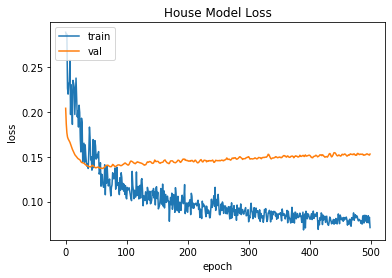

In [221]:
plt.plot(history_house.history['loss'])
plt.plot(history_house.history['val_loss'])
plt.title('House Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [30]:
best_house = load_model('saved_models_house/model_epoch_55.hdf5')

ANN_y_hat_house = best_house.predict(X_house_test)

print('ANN house RMSE:', np.sqrt(mean_squared_error(y_house_test, ANN_y_hat_house)))

ANN house RMSE: 0.3720574379213958


## Wilcoxon Tests 
$3! = 6$ permutations => 6 tests

In [31]:
from scipy.stats import wilcoxon

In [59]:
stat, p = wilcoxon(ANN_y_hat_house.flatten(), svm_y_hat_house.flatten())
print('W:', stat)
print('p-value:', p)

W: 303.0
p-value: 0.6374142004818293


In [60]:
stat, p = wilcoxon(ANN_y_hat_senate.flatten(), svm_y_hat_senate.flatten())
print('W', stat)
print('p-value', p)

W 29.0
p-value 1.788032577926195e-06


In [61]:
stat, p = wilcoxon(ANN_y_hat_house.flatten(), lin_y_hat_house.flatten())
print('W', stat)
print('p-value', p)

W 116.0
p-value 0.0006515494616043333


In [64]:
stat, p = wilcoxon(ANN_y_hat_senate.flatten(), lin_y_hat_senate.flatten())
print('W', stat)
print('p-value', p)

W 79.0
p-value 6.593803249100275e-05


In [65]:
stat, p = wilcoxon(svm_y_hat_house.flatten(), lin_y_hat_house.flatten())
print('W', stat)
print('p-value', p)

W 90.0
p-value 0.0001347181152656081


In [66]:
stat, p = wilcoxon(svm_y_hat_senate.flatten(), lin_y_hat_senate.flatten())
print('W', stat)
print('p-value', p)

W 321.0
p-value 0.8504636310822052


## Relative feature importance from p-values 
Model does not contain the intercept, so that we can focus on the features

In [164]:
import statsmodels.api as sm
mod = sm.OLS(y_house_train, X_house_train)
fii = mod.fit()
p_values = fii.summary2().tables[1]


p_values_house = p_values.set_index(house.columns)
p_values_house

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
percent_with_internet_subscription,-0.196990,0.223266,-0.882310,0.379178,-0.638541,0.244562
education_25_older_bachelor's_degree,0.893802,0.225132,3.970130,0.000116,0.448561,1.339043
household_median_income,-0.172222,0.235890,-0.730094,0.466597,-0.638739,0.294296
percent_with_disability,0.527024,0.172399,3.057011,0.002696,0.186073,0.867976
total_moved_to_US_from_abroad,0.799530,0.163124,4.901368,0.000003,0.476921,1.122139
Percent_Very_Religious,0.420359,0.183084,2.295984,0.023217,0.058274,0.782443
Percent_Nonreligious,0.588018,0.235586,2.495975,0.013765,0.122100,1.053935
mass_shootings,0.098938,0.183493,0.539190,0.590644,-0.263955,0.461831
believes_climate_change,0.014981,0.148474,0.100898,0.919781,-0.278656,0.308618


In [107]:
X_senate_train = sm.add_constant(X_senate_train)
mod = sm.OLS(y_senate_train, X_senate_train)
fii = mod.fit()
p_values = fii.summary2().tables[1]
p_values_senate = p_values.set_index(senate.columns)
p_values_senate

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
percent_with_internet_subscription,-0.284794,0.198144,-1.437311,1.529433e-01,-0.676661,0.107073
education_25_older_bachelor's_degree,0.743483,0.199799,3.721146,2.900527e-04,0.348341,1.138624
household_median_income,0.029656,0.209347,0.141661,8.875591e-01,-0.384368,0.443680
percent_with_disability,0.485984,0.153000,3.176368,1.848370e-03,0.183397,0.788571
total_moved_to_US_from_abroad,0.824279,0.144769,5.693763,7.427757e-08,0.537971,1.110588
Percent_Very_Religious,0.424207,0.162483,2.610774,1.005477e-02,0.102865,0.745550
Percent_Nonreligious,0.512780,0.209078,2.452579,1.545968e-02,0.099288,0.926271
mass_shootings,-0.007212,0.162846,-0.044290,9.647386e-01,-0.329272,0.314847
believes_climate_change,0.099020,0.131768,0.751474,4.536758e-01,-0.161576,0.359616


Plot the p-values for the two tasks side by side

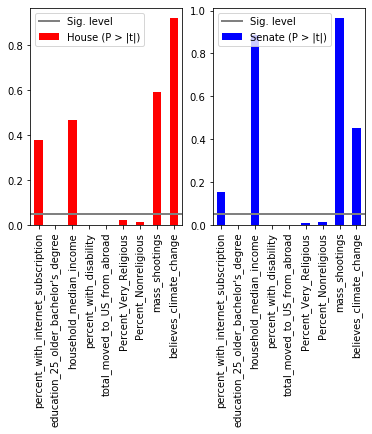

In [129]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.axhline(y=0.05,linewidth=2, color='grey')
ax2.axhline(y=0.05,linewidth=2, color='grey')

p_values_house.plot(kind='bar', y='P>|t|', ax = ax1, color='red')
ax1.legend(['Sig. level', 'House (P > |t|)'])
p_values_senate.plot(kind='bar', y='P>|t|', ax = ax2, color='blue')
ax2.legend(['Sig. level', 'Senate (P > |t|)'])

plt.savefig('p_values.png', bbox_inches = 'tight')
